In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
len(df)

50000

### So Basically this dataset have some HTML Tags and do requires some cleaning and preprocessing.

In [5]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,negative,25000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()  #To check for Null Value 

review       0
sentiment    0
dtype: int64

# Exploratory Data Analysis :

In [8]:
df.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


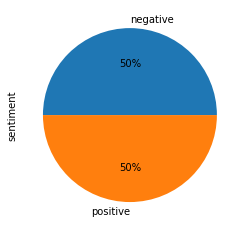

In [9]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

In [10]:
Length_of_ds=pd.DataFrame(df['review'].apply(len))

In [11]:
Length_of_ds.head(10)

,review
0,1761
1,998
2,926
3,748
4,1317
5,656
6,726
7,934
8,681
9,176


In [12]:
Length_of_ds.describe()

,review
count,50000.000000
mean,1309.431020
std,989.728014
min,32.000000
25%,699.000000
50%,970.000000
75%,1590.250000
max,13704.000000


In [13]:
df['review'][5]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'

## Text Preprocessing :

In [14]:
import re
import nltk
from nltk.corpus import stopwords                   
from nltk.stem.porter import PorterStemmer            #For Stemming Of words
from bs4 import BeautifulSoup                         #To remove HTML Tags

In [15]:
corpus_bag=[]

In [16]:
features=df.iloc[:,0]

In [17]:
features

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [18]:
labels=df.iloc[:,1]

In [19]:
labels

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

#### Since Iterating through whole 50000 records will take very much time, i am limting myself for only 5000 records.

In [20]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [21]:
def clean_html(text):
    soup=BeautifulSoup(text,"html.parser")
    return soup.get_text()

In [22]:
df['review']=df['review'].apply(clean_html)

In [23]:
def clean_mess(text):
    return re.sub('[^a-zA-Z]'," ",text)
    

In [24]:
df['review']=df['review'].apply(clean_mess)

In [25]:
df['review'][1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [162]:
cv=CountVectorizer(ngram_range=(2,2),stop_words=stopwords.words('english'))
tfidft=TfidfTransformer()
tfidfv=TfidfVectorizer()
mnb=MultinomialNB()
logm=LogisticRegression()
#svm_mod=SVC()
rfc=RandomForestClassifier()


In [163]:
cv.fit_transform(features)

<50000x3093651 sparse matrix of type '<class 'numpy.int64'>'
	with 5737519 stored elements in Compressed Sparse Row format>

In [164]:
data1=cv.fit_transform(features)

In [165]:
data2=tfidft.fit_transform(data1)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels, test_size=0.3, random_state=0)

In [167]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [168]:
mnb.predict(X_test)

array(['positive', 'negative', 'positive', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [169]:
pred1=mnb.predict(X_test)

In [170]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

    negative       0.87      0.90      0.88      7540
    positive       0.89      0.86      0.88      7460

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



In [171]:
print('The Acuuracy Score : ',round(accuracy_score(y_test,pred),2))

0.8802666666666666

## SET 2:

In [146]:
tfidfv_cust=TfidfVectorizer(ngram_range=(2,2),stop_words=stopwords.words('english'))

In [147]:
data11=tfidfv_cust.fit_transform(features)

In [148]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data11, labels, test_size=0.2, random_state=0)

In [149]:
mnb.fit(X1_train,y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [150]:
mnb.predict(X1_test)

array(['positive', 'negative', 'positive', ..., 'positive', 'negative',
       'negative'], dtype='<U8')

In [151]:
pred11=mnb.predict(X1_test)

In [152]:
print(classification_report(y1_test,pred11))

              precision    recall  f1-score   support

    negative       0.87      0.90      0.88      5035
    positive       0.90      0.86      0.88      4965

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [160]:
print(confusion_matrix(y1_test,pred11))

[[4539  496]
 [ 708 4257]]


In [159]:
print('The Acuuracy Score : ',round(accuracy_score(y1_test,pred11),2))

The Acuuracy Score :  0.88


In [161]:
df_avc=pd.DataFrame({"Actual Class":y1_test,"Predicted Class":pred11})
df_avc.head(10)

,Actual Class,Predicted Class
11841,positive,positive
19602,negative,negative
45519,negative,positive
25747,positive,positive
42642,positive,positive
31902,negative,positive
30346,positive,positive
12363,negative,negative
32490,positive,positive
26128,negative,negative


### As You Can see , i have used TfidfVectoriser with Naive Bayes Theorem -MultinomialNB classifier , and it game me about 88% Accuracy